<a href="https://colab.research.google.com/github/bezerraluis/Churn--Project/blob/master/Cientista_de_Dados_J%C3%BAnior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Desafio
 Uma empresa atacadista (Cedente) possui 1 cheque (Título) no valor de 10.000 de um mercado que é seu cliente (Sacado) com vencimento para daqui a 1 mês, mas o cedente necessita de dinheiro hoje para pagar uma dívida. O Cedente procura a RED para adiantar um cheque, a taxa cobrada é de 5% a.m (juros compostos), ou seja, o Cedente vai receber hoje
95% do valor do cheque 9.500 , os 500 são chamados de valor de deságio e a RED vai receber os de 10.000 no final no vencimento do título.

1. Com base nesse mecanismo, e na carteira de títulos que ela adquiriu (arquivo
BASE_TITULOS.txt enviado junto), gostaríamos que você fizesse uma análise descritiva
dos ativos como se fosse realizar uma apresentação para um executivo demonstrando
a situação da carteira atual (Regionalização, concentrações de clientes, taxas de
pagamento, Receitas, etc.). Nesse momento não é necessário utilizar as variáveis
RISCO_XX (não é necessário a construção de uma apresentação, somente a
apresentação dos gráficos, tabelas, resultados etc. e os comentários sobres os
resultados).

2. Com base no mesmo arquivo calcule indicadores por cedentes que achar necessários e
utilize técnicas de algoritmos não supervisionados para criar uma segmentação de
Cedentes com base em perfis parecidos, de acordo com os indicadores calculados.
Detalhe a escolha da metodologia e os indicadores criados para realizar a
segmentação. Nesse momento não é necessário utilizar as variáveis RISCO_XX.
Nessa mesma base, possuímos os resultados se os títulos foram pagos em dia ou em atraso
(STATUS_LIQ_TITULO) e algumas outras informações de risco (RISCO_XX) sobre os títulos no
momento de sua emissão.

3. Com base nesse histórico de títulos utilize algoritmos supervisionados, com a variável
resposta STATUS_LIQ_TITULO. Caso acha necessário pode-se criar novas variáveis,
segmentações, etc. para se encontrar a melhor metodologia possível. Como resposta
da questão detalhar a escolha da metodologia, as análises adicionar realizadas e as
suas métricas de avaliação dos modelos.



## Index:

1 Problema de Negócio.

2 Importações de bibliotecas

3.0 Análise descritiva dos Dados
 
 3.1 Descrição dos dados
 
 3.2 Verificando valores nulos
 
 3.3 Verificando a distribuição e outliers

4.0 Análise Exploratória

5.0 Limpeza de dados

6.0 Preparando os dados 

7.0Algoritmo Não Supervisionado

8.0 Algoritmo Supervisionado

9.0 Criando novas variáveis

10.0 SMOTE

11.0 Métricas

12.0 Modelo base

13.0 Validação Cruzada

14.0 Tunning/Treinamento do modelo





 # 1.0 Negócio

#Breve relato sobre a empresa
Desde 1992, nossos profissionais têm se dedicado a operações de crédito e fomento a
pequenas, médias e grandes empresas, entregando resultados consistentes a nossos clientes e
acionistas.
O grupo RED é formado essencialmente por duas empresas:
A “RED Serviços”, que nasceu como uma sociedade de fomento mercantil há mais de vinte
anos e na última década se especializou na prestação de serviços de análise, consultoria e
cobrança de créditos para Fundos de Investimento em Direitos Creditórios (“FIDCs”).
A “REDASSET Gestão” que foi fundada em 2010 por profissionais com vasta experiência em
operações de crédito e/ou vindos de grandes bancos de investimentos e se habilitou junto à
Comissão de Valores Mobiliários para a atividade de administração de carteiras de títulos e
valores mobiliários de terceiros, especialmente de FIDCs. A sociedade gestora atua com equipe
própria e total independência na tomada das decisões de investimento.
Nosso foco é na manutenção de um portfólio bastante pulverizado, no que tange aos cedentes
e/ou devedores, aliado a rígidos controles internos e de TI, sendo nossa principal preocupação
a preservação de capital dos cotistas e o alcance de uma rentabilidade acima da média no
longo prazo.
O grupo RED tem hoje como uma de suas missões fazer dos FIDCs que estruturou, e para os
quais presta serviços, um importante veículo de desintermediação bancária, permitindo às
empresas clientes/cedentes um acesso facilitado à antecipação de recebíveis e
consequentemente ao crédito, proporcionando, do outro lado, a possibilidade de ganhos
diferenciados para os investidores/cotistas dos FIDCs.
A Antecipação de recebíveis é o mecanismo no qual empresas (Cedentes) conseguem adiantar
o fluxo de vendas a prazo, duplicatas, vendas parceladas no cartão de crédito, boletos,
cheques pré-datados, contratos de prestação de serviços entre outros. Esse adiantamento se
dá por meio de uma instituição financeira que “compra” o recebível do cedente aplicando uma
taxa de juros de deságio a de acordo com o prazo do recebível. 

 # 2.0 Importando bibliotecas

In [575]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from scipy import stats

# para tirar os valores de notação científica
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')

# Desabilitando warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# bibliotecas de machine Learning

from sklearn.model_selection import train_test_split
from fancyimpute import KNN
from sklearn.preprocessing import MinMaxScaler ,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split , KFold , cross_val_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier





# 3.0 Análise discritiva de dados

## 3.1 Descrição dos dados

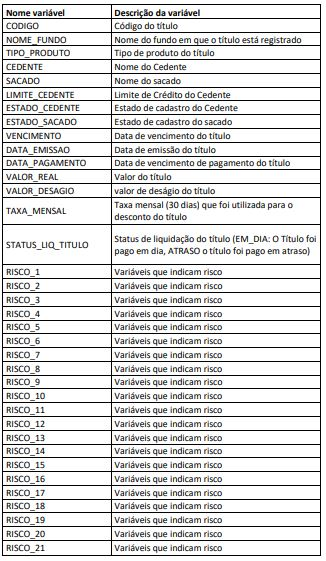



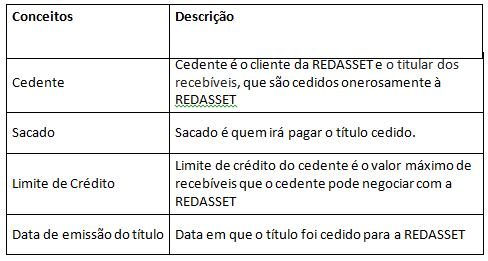

In [417]:
base = pd.read_table('BASE_TITULOS.txt')

In [418]:
base.head()

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,RISCO_1,RISCO_2,RISCO_3,RISCO_4,RISCO_5,RISCO_6,RISCO_7,RISCO_8,RISCO_9,RISCO_10,RISCO_11,RISCO_12,RISCO_13,RISCO_14,RISCO_15,RISCO_16,RISCO_17,RISCO_18,RISCO_19,RISCO_20,RISCO_21,STATUS_LIQ_TITULO
0,1,Fundo 1,Produto 1,Cedente 2,Sacado 249,10000000,CE,SP,2018-03-18,2017-10-28,2018-03-18,"1,190.990",166.385,0.028,0.028,1.000,0.000,nan,0.000,nan,0.000,0.611,0.000,nan,0.000,nan,0.168,0,0.067,0.200,0.728,0.739,0.407,0.860,0.985,EM_DIA
1,2,Fundo 2,Produto 1,Cedente 1,Sacado 1372,8035714,PA,MG,2018-06-24,2018-05-21,2018-06-21,"29,209.380",571.781,0.017,0.193,0.500,0.958,0.014,0.013,0.247,0.000,0.381,0.020,0.015,0.667,0.161,0.392,0,0.267,0.600,0.010,0.013,0.395,0.698,0.707,EM_DIA
2,3,Fundo 1,Produto 1,Cedente 2,Sacado 346,10000000,CE,PR,2018-03-19,2017-11-29,2018-03-21,756.660,63.952,0.022,0.034,1.000,0.000,nan,0.000,nan,0.000,0.581,0.000,nan,0.000,nan,0.110,0,0.067,0.200,0.327,0.321,0.395,0.890,0.988,ATRASO
3,4,Fundo 2,Produto 1,Cedente 1,Sacado 585,8035714,PA,PA,2018-04-03,2018-02-14,2018-04-06,"7,869.880",190.765,0.015,0.183,0.500,0.125,0.008,0.000,0.685,0.000,0.179,0.020,0.129,0.667,0.100,0.416,0,0.400,0.600,0.012,0.017,0.420,0.610,0.906,ATRASO
4,5,Fundo 1,Produto 1,Cedente 2,Sacado 2184,10000000,CE,RJ,2018-02-02,2017-11-03,2018-02-02,"1,064.920",105.977,0.032,0.028,1.000,0.000,nan,0.000,nan,0.000,0.514,0.000,nan,0.000,nan,0.168,0,0.067,0.200,0.728,0.739,0.407,0.860,0.368,EM_DIA


In [419]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9415 entries, 0 to 9414
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CODIGO             9415 non-null   int64  
 1   NOME_FUNDO         9415 non-null   object 
 2   TIPO_PRODUTO       9415 non-null   object 
 3   CEDENTE            9415 non-null   object 
 4   SACADO             9415 non-null   object 
 5   LIMITE_CEDENTE     9415 non-null   int64  
 6   ESTADO_CEDENTE     9415 non-null   object 
 7   ESTADO_SACADO      9173 non-null   object 
 8   VENCIMENTO         9415 non-null   object 
 9   DATA_EMISSAO       9415 non-null   object 
 10  DATA_PAGAMENTO     9415 non-null   object 
 11  VALOR_REAL         9415 non-null   float64
 12  VALOR_DESAGIO      9415 non-null   float64
 13  TAXA_MENSAL        9413 non-null   float64
 14  RISCO_1            9415 non-null   float64
 15  RISCO_2            9415 non-null   float64
 16  RISCO_3            9415 

### 3.1.1 Mudando o formato de algumas colunas 

In [420]:
base['VENCIMENTO'] = pd.to_datetime(base['DATA_EMISSAO'],format="%Y/%m/%d")
base['DATA_EMISSAO'] = pd.to_datetime(base['DATA_EMISSAO'],format="%Y/%m/%d")
base['DATA_PAGAMENTO'] = pd.to_datetime(base['DATA_EMISSAO'],format="%Y/%m/%d")

## 3.2 Verificando Valores Nulos

<Figure size 432x288 with 0 Axes>

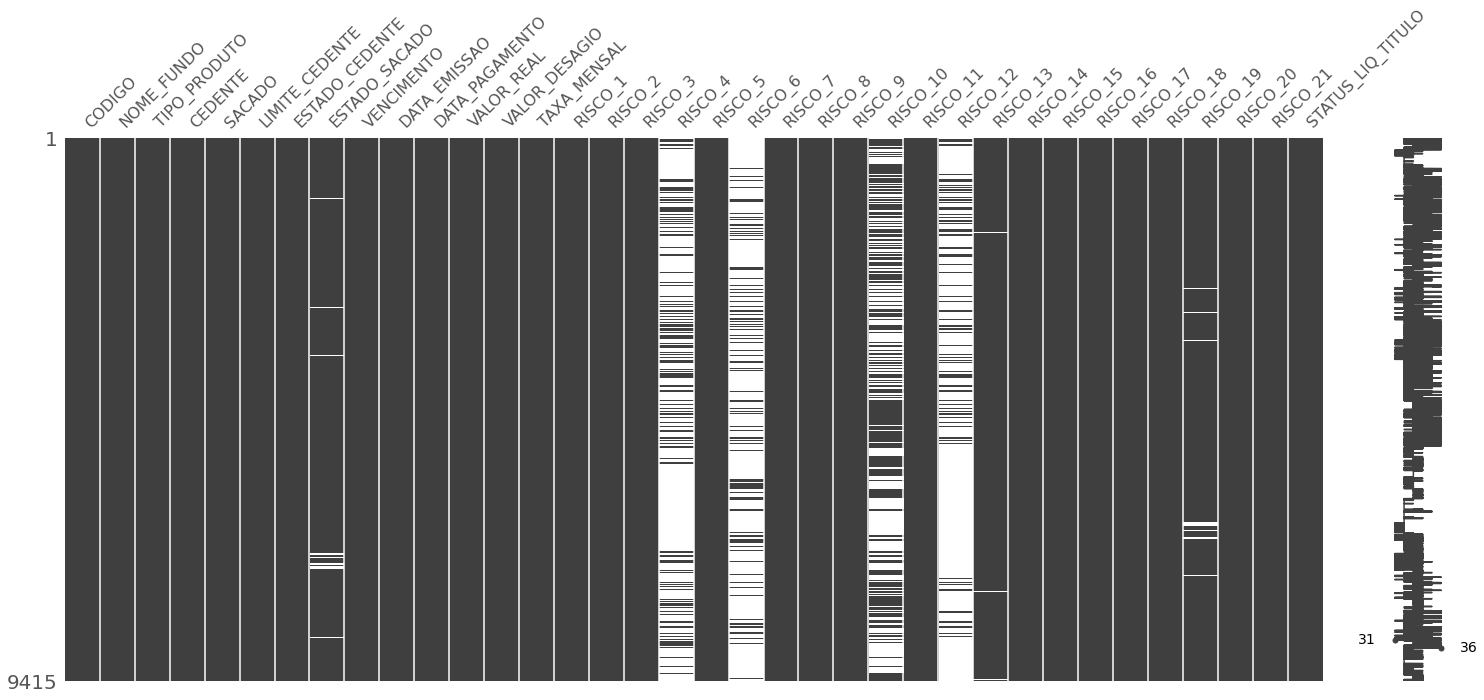

In [421]:
plt.figure(figsize=(6,4))
msno.matrix(base)
plt.show()

In [422]:
def missing_values(data):
    
    # Null total 
    missing_values = data.isnull().sum()
    
    # Order nulls 
    total = missing_values.sort_values(ascending=True)
    
    # Percentage  
    percent = (missing_values / len(data.index)*100).round(2).sort_values(ascending=True)

    table_missing = pd.concat([total, percent], axis=1, keys=['Number of Nulls', 'Percentagem of Nulls %'])
  
    return table_missing.tail(10)


In [423]:
missing_values(base)

,Number of Nulls,Percentagem of Nulls %
LIMITE_CEDENTE,0,0.000
SACADO,0,0.000
TAXA_MENSAL,2,0.020
RISCO_13,40,0.420
RISCO_19,137,1.460
ESTADO_SACADO,242,2.570
RISCO_10,4485,47.640
RISCO_4,6847,72.720
RISCO_6,7754,82.360
RISCO_12,7764,82.460


#### Temos Várias colunas com valores faltantes , algumas como as colunas RISCO que tem muito valores faltantes e vamos ter que escolher métodos diferentes para inputar esses dados 

## 3.3 Verificando a variável rsposta

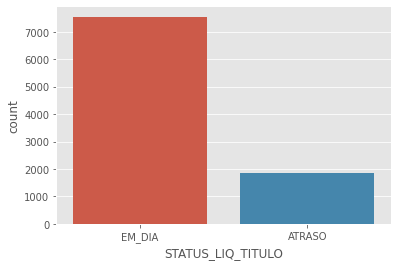

In [545]:
# Podemos ver que temos classes desbalanceadas
sns.countplot(x='STATUS_LIQ_TITULO',data=base)

In [546]:
base['STATUS_LIQ_TITULO'].value_counts()

EM_DIA    7548
ATRASO    1867
Name: STATUS_LIQ_TITULO, dtype: int64

## 3.4 Verificando a distribuição e outliers

In [424]:
base_nume =base[['LIMITE_CEDENTE','VALOR_REAL','VALOR_DESAGIO','TAXA_MENSAL']]
base_nume =base[['LIMITE_CEDENTE','VALOR_REAL','VALOR_DESAGIO','TAXA_MENSAL']].describe()

In [425]:
stats = base_nume.describe()
stats.loc['var'] = base_nume.var().tolist()
stats.loc['skew'] = base_nume.skew().tolist()
stats.loc['kurt'] = base_nume.kurtosis().tolist()
pd.DataFrame(stats).T

,count,mean,std,min,25%,50%,75%,max,var,skew,kurt
LIMITE_CEDENTE,8.000,"4,565,365.736","3,709,376.897",0.000,"1,877,353.750","4,506,755.444","7,232,143.000","10,000,000.000","13,759,476,962,143.412",0.064,-1.389
VALOR_REAL,8.000,"396,765.216","1,097,208.165",17.240,853.920,"4,651.268","17,543.183","3,112,000.000","1,203,865,756,713.941",2.828,7.996
VALOR_DESAGIO,8.000,"22,086.976","57,077.179",0.175,65.956,345.435,"4,876.626","163,116.718","3,257,804,311.479",2.811,7.921
TAXA_MENSAL,8.000,"1,176.875","3,327.897",-0.532,0.032,0.048,0.621,"9,413.000","11,074,900.107",2.828,8.000


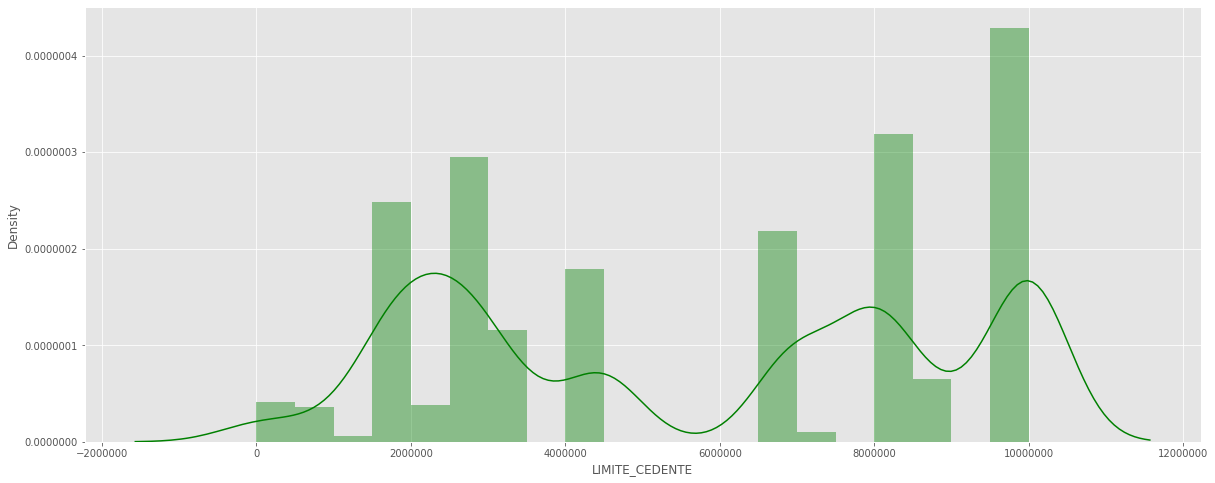

In [426]:
# sets the figure size in inches
plt.figure(figsize=(20,8))
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

sns.distplot(base['LIMITE_CEDENTE'], color="green")
#plt.xlim(130,200)

plt.show()

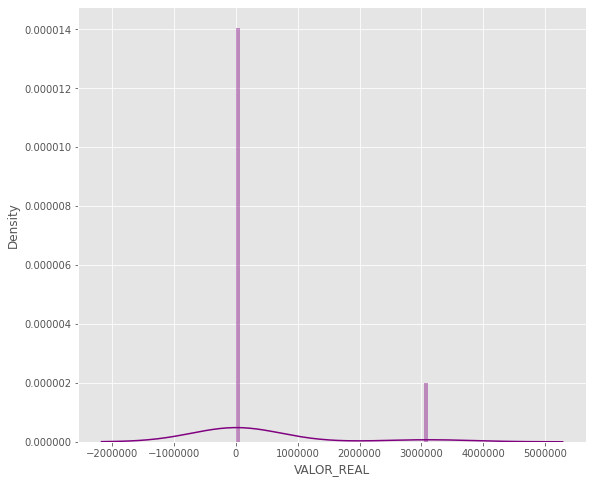

In [427]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(base_nume['VALOR_REAL'], color="purple")
#plt.xlim(130,200)


plt.show()

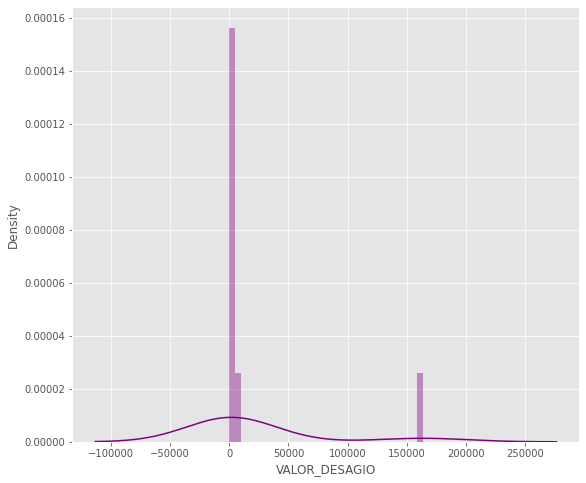

In [428]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(base_nume['VALOR_DESAGIO'], color="purple")
#plt.xlim(130,200)



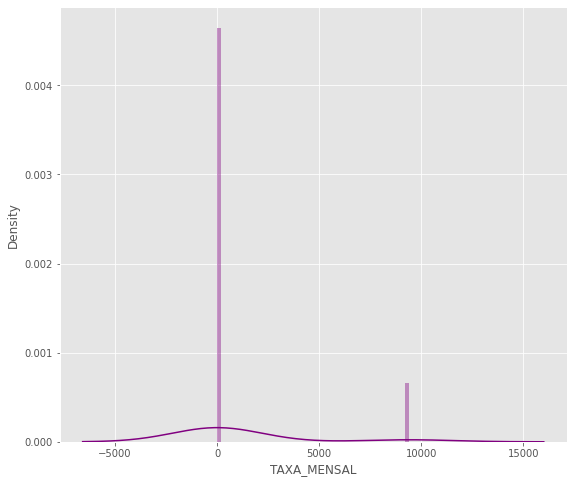

In [429]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(base_nume['TAXA_MENSAL'], color="purple")
#plt.xlim(130,200)



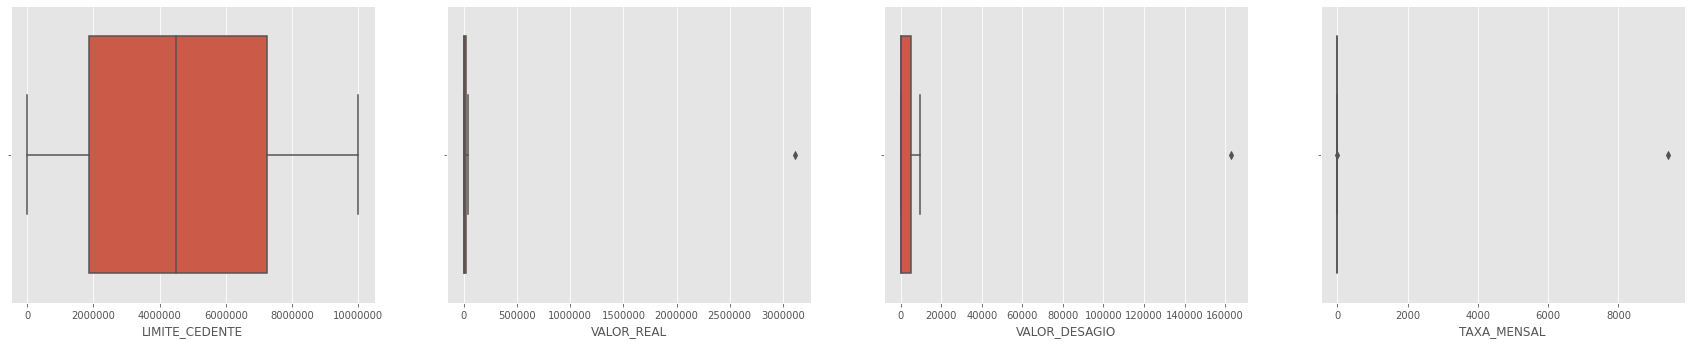

In [430]:
# Variáveis
variables = base_nume.select_dtypes(['int64', 'float64']).columns.to_list()

# Setando a posicão inicial
n = 1

plt.figure(figsize=(30, 30))
for column in base_nume[variables].columns:
    plt.subplot(4, 4, n)
    plt.ticklabel_format(style='plain', axis='x')
    _ = sns.boxplot(x=column, data=base_nume)
    n += 1

plt.subplots_adjust(hspace=0.5)
plt.show()

#### Podemos ver que as variáveis não seguem uma distribuição normal e temos poucos valores fora de range , isso vai auxiliar na escolha das transformações que serão feitas mais para frente.

# 4.0 Análise Exploratória

(Regionalização, concentrações de clientes, taxas de
pagamento, Receitas,

In [431]:
base_analise = base.drop(['RISCO_1','RISCO_2','RISCO_3','RISCO_4','RISCO_5','RISCO_6','RISCO_7','RISCO_8','RISCO_9','RISCO_10','RISCO_11','RISCO_12','RISCO_13','RISCO_14','RISCO_15','RISCO_16','RISCO_17','RISCO_18','RISCO_19','RISCO_20','RISCO_21'],axis=1)

In [432]:
base_analise.head()

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,STATUS_LIQ_TITULO
0,1,Fundo 1,Produto 1,Cedente 2,Sacado 249,10000000,CE,SP,2017-10-28,2017-10-28,2017-10-28,"1,190.990",166.385,0.028,EM_DIA
1,2,Fundo 2,Produto 1,Cedente 1,Sacado 1372,8035714,PA,MG,2018-05-21,2018-05-21,2018-05-21,"29,209.380",571.781,0.017,EM_DIA
2,3,Fundo 1,Produto 1,Cedente 2,Sacado 346,10000000,CE,PR,2017-11-29,2017-11-29,2017-11-29,756.660,63.952,0.022,ATRASO
3,4,Fundo 2,Produto 1,Cedente 1,Sacado 585,8035714,PA,PA,2018-02-14,2018-02-14,2018-02-14,"7,869.880",190.765,0.015,ATRASO
4,5,Fundo 1,Produto 1,Cedente 2,Sacado 2184,10000000,CE,RJ,2017-11-03,2017-11-03,2017-11-03,"1,064.920",105.977,0.032,EM_DIA


In [433]:
base_analise['ANO']= base['DATA_PAGAMENTO'].dt.year
base_analise['MES']= base['DATA_PAGAMENTO'].dt.month
base_analise['DIA']= base['DATA_PAGAMENTO'].dt.day

In [434]:
base_analise['MES'].unique()

array([10,  5, 11,  2,  3,  6,  7,  1,  4,  8,  9, 12])

## 4.1 Tipo de produto por estado

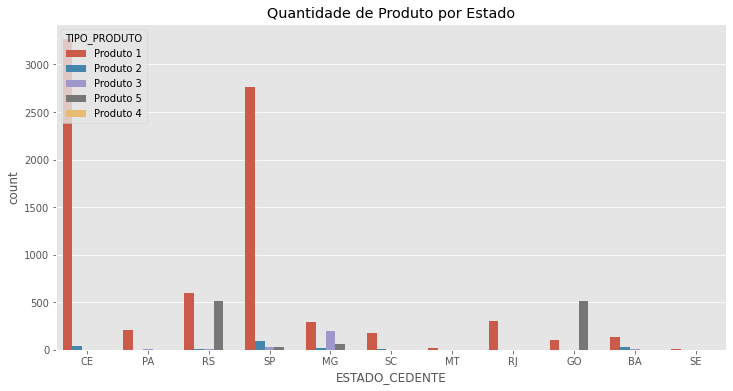

In [664]:
# sets plot features
plt.figure(figsize=(12,6))
plt.title("Quantidade de Produto por Estado")
plt.xlabel("Estado Cedente")
plt.ylabel("Quantidade")
sns.countplot(x='ESTADO_CEDENTE',hue='TIPO_PRODUTO',data=base_analise)

##### Podemos Ver que Produto1 é o mais vendido , principalmente em São Paulo e Ceará

## 4.2Cliente por *estado*

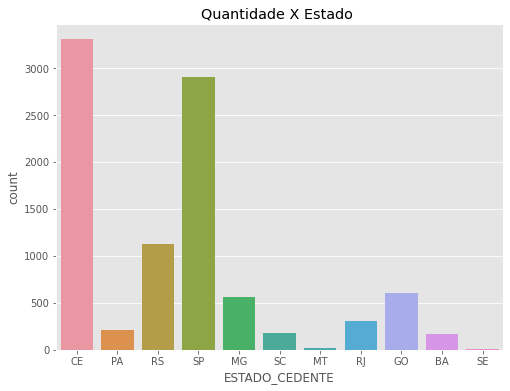

In [665]:
# sets plot features
plt.figure(figsize=(8,6))
plt.title("Quantidade X Estado ")
plt.xlabel("Estado Cedente")
plt.ylabel("Quantidade")
sns.countplot(x='ESTADO_CEDENTE',data=base_analise)

####A maior parte dos clientes são de São Paulo ,Ceará e Rio Grande do Sul

## 4.3 Tipo de fundo por estado

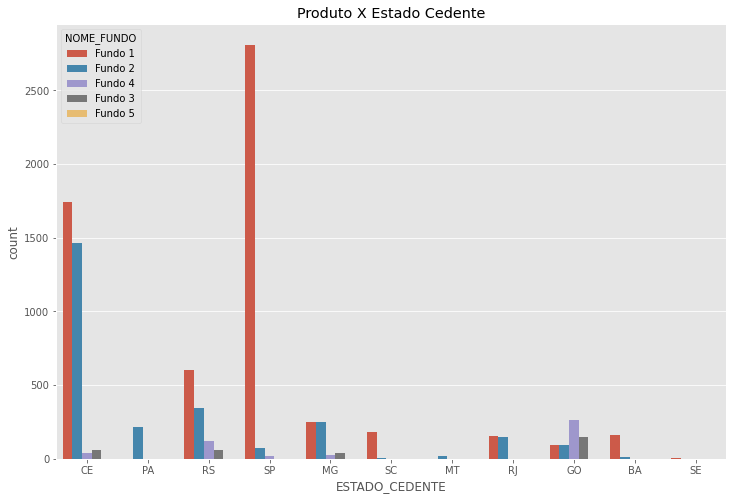

In [666]:
# sets plot features
plt.figure(figsize=(12,8))
plt.title("Produto X Estado Cedente")
plt.xlabel("Estado Cedente")
plt.ylabel("Quantidade")
sns.countplot(x='ESTADO_CEDENTE',hue='NOME_FUNDO',data=base_analise)

#### Os Tipos de fundo 1 e 2 São os que tem maior procura 

## 4.4 Desagio por mês

     VALOR_DESAGIO
MES               
1      398,912.822
2      436,916.040
3      654,522.000
4      428,903.357
5      386,405.445
6      317,001.753
7      306,800.578
8      351,322.406
9      170,951.818
10     121,606.627
11     404,327.049
12     595,288.507


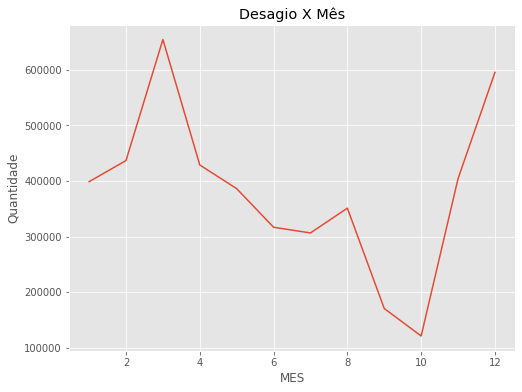

In [667]:

print(pd.DataFrame(base_analise.groupby('MES')['VALOR_DESAGIO'].sum()))
# sets plot features
plt.figure(figsize=(8,6))
plt.title("Desagio X Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade")
base_analise.groupby('MES')['VALOR_DESAGIO'].sum().plot();

#### No mês de Março e Dezembro onde tem os maiores valores de Deságio , e no nos meses de outubro e  Novembro os menores 

## 4.5 Clientes em dia X atraso

In [668]:
stat = base_analise['STATUS_LIQ_TITULO'].value_counts()


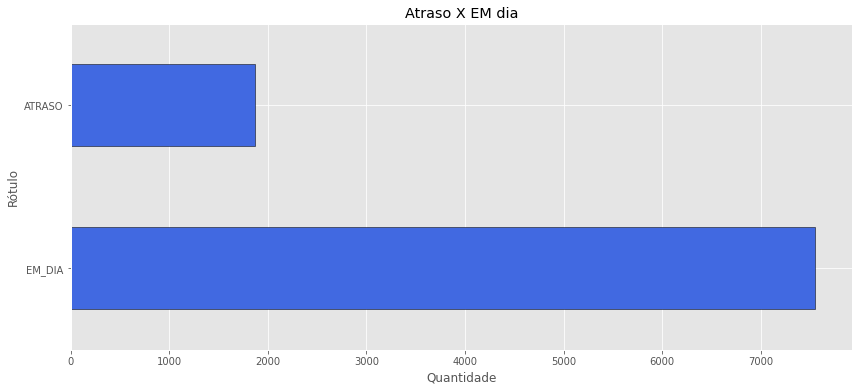

In [669]:
# sets plot features
plt.figure(figsize=(14,6))
plt.title("Atraso X EM dia")
plt.xlabel("Quantidade")
plt.ylabel("Rótulo")
plt.style.use("ggplot") 
stat.plot(kind='barh', color='royalblue', edgecolor='black')

In [670]:
porc = (stat[0]/len(base_analise))*100
porc1 = (stat[1]/len(base_analise))*100
pd.DataFrame({'Pagaram % ':[porc],'Náo pagaram %':[porc1],'Atraso total':stat[0],'Em dia Total':stat[1]})

,Pagaram %,Náo pagaram %,Atraso total,Em dia Total
0,80.170,19.830,7548,1867


#### 20 % de inadimplência

## 4.6  Total de Desagio em Atraso

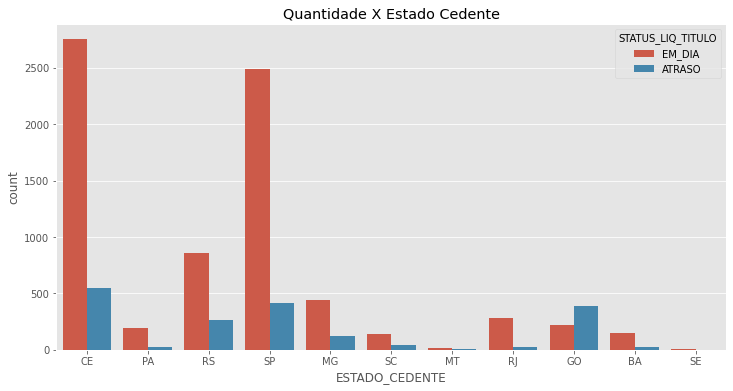

In [671]:
# sets plot features
plt.figure(figsize=(12,6))
plt.title("Quantidade X Estado Cedente")
plt.xlabel("Estado Cedente")
plt.ylabel("Quantidade")
sns.countplot(x='ESTADO_CEDENTE',hue='STATUS_LIQ_TITULO',data=base_analise)

In [443]:
pd.DataFrame(base_analise.groupby('STATUS_LIQ_TITULO')['VALOR_DESAGIO'].sum())

,VALOR_DESAGIO
STATUS_LIQ_TITULO,
ATRASO,"872,898.051"
EM_DIA,"3,700,060.352"


#### Ceará , São Paulo e Goiás tem o maior número de inadimplência uma valor de 872,898.051

#5.0 Limpeza dos dados

In [444]:
base.head()

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,RISCO_1,RISCO_2,RISCO_3,RISCO_4,RISCO_5,RISCO_6,RISCO_7,RISCO_8,RISCO_9,RISCO_10,RISCO_11,RISCO_12,RISCO_13,RISCO_14,RISCO_15,RISCO_16,RISCO_17,RISCO_18,RISCO_19,RISCO_20,RISCO_21,STATUS_LIQ_TITULO
0,1,Fundo 1,Produto 1,Cedente 2,Sacado 249,10000000,CE,SP,2017-10-28,2017-10-28,2017-10-28,"1,190.990",166.385,0.028,0.028,1.000,0.000,nan,0.000,nan,0.000,0.611,0.000,nan,0.000,nan,0.168,0,0.067,0.200,0.728,0.739,0.407,0.860,0.985,EM_DIA
1,2,Fundo 2,Produto 1,Cedente 1,Sacado 1372,8035714,PA,MG,2018-05-21,2018-05-21,2018-05-21,"29,209.380",571.781,0.017,0.193,0.500,0.958,0.014,0.013,0.247,0.000,0.381,0.020,0.015,0.667,0.161,0.392,0,0.267,0.600,0.010,0.013,0.395,0.698,0.707,EM_DIA
2,3,Fundo 1,Produto 1,Cedente 2,Sacado 346,10000000,CE,PR,2017-11-29,2017-11-29,2017-11-29,756.660,63.952,0.022,0.034,1.000,0.000,nan,0.000,nan,0.000,0.581,0.000,nan,0.000,nan,0.110,0,0.067,0.200,0.327,0.321,0.395,0.890,0.988,ATRASO
3,4,Fundo 2,Produto 1,Cedente 1,Sacado 585,8035714,PA,PA,2018-02-14,2018-02-14,2018-02-14,"7,869.880",190.765,0.015,0.183,0.500,0.125,0.008,0.000,0.685,0.000,0.179,0.020,0.129,0.667,0.100,0.416,0,0.400,0.600,0.012,0.017,0.420,0.610,0.906,ATRASO
4,5,Fundo 1,Produto 1,Cedente 2,Sacado 2184,10000000,CE,RJ,2017-11-03,2017-11-03,2017-11-03,"1,064.920",105.977,0.032,0.028,1.000,0.000,nan,0.000,nan,0.000,0.514,0.000,nan,0.000,nan,0.168,0,0.067,0.200,0.728,0.739,0.407,0.860,0.368,EM_DIA


## 5.1 Separando o conjunto em treino e teste

In [445]:
# Separando o conjunto de dados em x ,Y para usar o split e preencher os dados faltantes sem vazar dados do treino para o teste

x = base.drop(['STATUS_LIQ_TITULO','CODIGO'],axis=1)

Y = base['STATUS_LIQ_TITULO']

In [446]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size = 0.30,random_state = 42)

## 5.2 Verificando a variável Tipo_Produto

In [447]:
# não temos valores preenchidos errado
x_train['TIPO_PRODUTO'].unique()

array(['Produto 1', 'Produto 5', 'Produto 2', 'Produto 3', 'Produto 4'],
      dtype=object)

In [448]:
# não temos valores faltantes

x_train['TIPO_PRODUTO'].isna().sum()

0

In [449]:
# não temos valores preenchidos errado
x_test['TIPO_PRODUTO'].unique()

array(['Produto 1', 'Produto 5', 'Produto 3', 'Produto 2', 'Produto 4'],
      dtype=object)

In [450]:
# não temos valores faltantes
x_test['TIPO_PRODUTO'].isna().sum()

0

## 5.3 Verificando a variável Cedente

In [451]:
# não temos valores preenchidos errado
x_train['CEDENTE'].unique()

array(['Cedente 9', 'Cedente 1', 'Cedente 17', 'Cedente 2', 'Cedente 22',
       'Cedente 15', 'Cedente 8', 'Cedente 20', 'Cedente 23', 'Cedente 5',
       'Cedente 19', 'Cedente 3', 'Cedente 21', 'Cedente 12',
       'Cedente 14', 'Cedente 24', 'Cedente 16', 'Cedente 7',
       'Cedente 11', 'Cedente 13', 'Cedente 10', 'Cedente 18',
       'Cedente 4', 'Cedente 6'], dtype=object)

In [452]:
# não temos valores faltantes

x_train['CEDENTE'].isna().sum()

0

In [453]:
# não temos valores preenchidos errado
x_test['CEDENTE'].unique()

array(['Cedente 1', 'Cedente 9', 'Cedente 17', 'Cedente 2', 'Cedente 14',
       'Cedente 15', 'Cedente 23', 'Cedente 20', 'Cedente 24',
       'Cedente 12', 'Cedente 18', 'Cedente 3', 'Cedente 21',
       'Cedente 19', 'Cedente 5', 'Cedente 8', 'Cedente 6', 'Cedente 4',
       'Cedente 11', 'Cedente 13', 'Cedente 10', 'Cedente 22',
       'Cedente 16', 'Cedente 7'], dtype=object)

In [454]:
# não temos valores faltantes
x_test['CEDENTE'].isna().sum()

0

## 5.4 Verificando a variável Sacado

In [455]:
# não temos valores preeenchidos errados 
x_train['SACADO'].unique()

array(['Sacado 3627', 'Sacado 729', 'Sacado 2694', ..., 'Sacado 1531',
       'Sacado 284', 'Sacado 2161'], dtype=object)

In [456]:
# não temos valores faltantes

x_train['SACADO'].isna().sum()

0

In [457]:
# não temos valores preenchidos errado
x_test['SACADO'].unique()

array(['Sacado 367', 'Sacado 3561', 'Sacado 1971', ..., 'Sacado 1150',
       'Sacado 3513', 'Sacado 4346'], dtype=object)

In [458]:
# não temos valores faltantes
x_test['SACADO'].isna().sum()

0

## 5.5 Verificando a variável Limite_Cedente

In [459]:
# não temos valores preenchido errados 
x_train['LIMITE_CEDENTE'].unique()

array([ 6964286,  8035714,  2500000, 10000000,  1785714,  3214286,
        1607143,  4464286,  8928571,  2982143,  2678571,  2142857,
              0,  1250000,   714286,   892857,  6875000,  2857143,
        7142857,   535714])

In [460]:
# não temos valores faltantes

x_train['LIMITE_CEDENTE'].isna().sum()

0

In [461]:
# não temos valores preenchidos errado
x_test['LIMITE_CEDENTE'].unique()

array([ 8035714,  6964286,  2500000, 10000000,  2142857,  3214286,
        1607143,  1785714,  4464286,  2678571,   535714,        0,
        2982143,  8928571,   892857,  6875000,  7142857,  1250000,
        2857143])

In [462]:
# não temos valores faltantes
x_test['LIMITE_CEDENTE'].isna().sum()

0

## 5.6 Verificando a variável Estado_Cedente

In [463]:
# não temos valores preenchidos errado
x_train['ESTADO_CEDENTE'].unique()

array(['SP', 'CE', 'RS', 'RJ', 'GO', 'MG', 'SC', 'BA', 'PA', 'MT', 'SE'],
      dtype=object)

In [464]:
# não temos valores faltantes 
x_train['ESTADO_CEDENTE'].isna().sum()

0

In [465]:
# não temos valores preenchidos errado
x_test['ESTADO_CEDENTE'].unique()

array(['CE', 'SP', 'BA', 'RS', 'GO', 'MG', 'SC', 'PA', 'RJ', 'MT', 'SE'],
      dtype=object)

In [466]:
# não temos valores faltantes
x_test['ESTADO_CEDENTE'].isna().sum()

0

## 5.7 Verificando a Variável Estado_Sacado

In [467]:
# não temos valores preenchido errado
x_train['ESTADO_SACADO'].unique()

array(['SP', 'BA', 'CE', 'RN', 'PB', 'DF', 'RS', 'MG', 'PI', 'PR', 'AL',
       'SC', 'GO', 'RJ', 'MT', 'RO', nan, 'ES', 'MS', 'PA', 'MA', 'PE',
       'TO', 'SE', 'AM', 'AC', 'AP', 'RR'], dtype=object)

In [468]:
# Temos 167 valores faltantes 
x_train['ESTADO_SACADO'].isna().sum()

167

In [469]:
# Foi escolhido o método backfill que encontra o ultimo valor preenchido e completa com ele , como são poucos valores e são categóricos.
x_train['ESTADO_SACADO'].fillna(method ='bfill',inplace = True )

In [470]:
# não temos mais valores faltantes
x_train['ESTADO_SACADO'].isna().sum()

0

In [471]:
# não temos valores preenchidos errado
x_test['ESTADO_SACADO'].unique()

array(['CE', 'SP', 'PR', 'ES', 'RJ', 'RS', 'MG', 'GO', 'PA', 'PB', 'SC',
       nan, 'MT', 'PE', 'MS', 'BA', 'AM', 'AP', 'AL', 'MA', 'DF', 'RN',
       'RO', 'TO', 'PI', 'SE', 'AC'], dtype=object)

In [472]:
# não temos valores faltantes
x_test['ESTADO_SACADO'].isna().sum()

75

In [473]:
# Foi Utilizado o mesmo método para preenchimento apenas com os dados de test para não ter vazamento de dados.
x_test['ESTADO_SACADO'].fillna(method ='bfill',inplace = True )

In [474]:
x_test['ESTADO_SACADO'].isna().sum()

0

## 5.8 Verificando a variável Vencimento

In [475]:
# Não temos nenhum data errada
x_train['VENCIMENTO'].unique()

array(['2018-05-04T00:00:00.000000000', '2017-11-30T00:00:00.000000000',
       '2017-12-09T00:00:00.000000000', '2017-12-07T00:00:00.000000000',
       '2017-12-14T00:00:00.000000000', '2017-11-21T00:00:00.000000000',
       '2018-03-02T00:00:00.000000000', '2017-09-19T00:00:00.000000000',
       '2017-09-28T00:00:00.000000000', '2018-02-16T00:00:00.000000000',
       '2018-03-24T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-06-28T00:00:00.000000000', '2018-05-19T00:00:00.000000000',
       '2018-05-02T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2017-12-16T00:00:00.000000000', '2018-04-03T00:00:00.000000000',
       '2018-02-25T00:00:00.000000000', '2017-04-25T00:00:00.000000000',
       '2017-12-18T00:00:00.000000000', '2017-12-03T00:00:00.000000000',
       '2018-03-08T00:00:00.000000000', '2018-01-23T00:00:00.000000000',
       '2017-11-04T00:00:00.000000000', '2018-06-25T00:00:00.000000000',
       '2018-06-19T00:00:00.000000000', '2017-08-31

In [476]:
# não temos nenhuma data vazia
x_train['VENCIMENTO'].isna().sum()

0

In [477]:
# não temos valores preenchidos errado
x_test['VENCIMENTO'].unique()

array(['2018-02-15T00:00:00.000000000', '2018-02-24T00:00:00.000000000',
       '2018-07-04T00:00:00.000000000', '2018-07-31T00:00:00.000000000',
       '2018-02-26T00:00:00.000000000', '2017-11-09T00:00:00.000000000',
       '2017-11-29T00:00:00.000000000', '2018-07-15T00:00:00.000000000',
       '2018-03-18T00:00:00.000000000', '2017-12-14T00:00:00.000000000',
       '2018-07-12T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-26T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2017-04-29T00:00:00.000000000',
       '2018-01-24T00:00:00.000000000', '2018-05-09T00:00:00.000000000',
       '2018-04-25T00:00:00.000000000', '2017-11-28T00:00:00.000000000',
       '2018-08-17T00:00:00.000000000', '2017-11-13T00:00:00.000000000',
       '2018-08-23T00:00:00.000000000', '2018-05-17T00:00:00.000000000',
       '2018-06-30T00:00:00.000000000', '2018-07-27T00:00:00.000000000',
       '2018-08-13T00:00:00.000000000', '2017-12-08

In [478]:
# não temos valores faltantes
x_test['VENCIMENTO'].isna().sum()

0

## 5.9 Verificando a Variável Data_emissao

In [479]:
x_train['DATA_EMISSAO'].unique()

array(['2018-05-04T00:00:00.000000000', '2017-11-30T00:00:00.000000000',
       '2017-12-09T00:00:00.000000000', '2017-12-07T00:00:00.000000000',
       '2017-12-14T00:00:00.000000000', '2017-11-21T00:00:00.000000000',
       '2018-03-02T00:00:00.000000000', '2017-09-19T00:00:00.000000000',
       '2017-09-28T00:00:00.000000000', '2018-02-16T00:00:00.000000000',
       '2018-03-24T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-06-28T00:00:00.000000000', '2018-05-19T00:00:00.000000000',
       '2018-05-02T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2017-12-16T00:00:00.000000000', '2018-04-03T00:00:00.000000000',
       '2018-02-25T00:00:00.000000000', '2017-04-25T00:00:00.000000000',
       '2017-12-18T00:00:00.000000000', '2017-12-03T00:00:00.000000000',
       '2018-03-08T00:00:00.000000000', '2018-01-23T00:00:00.000000000',
       '2017-11-04T00:00:00.000000000', '2018-06-25T00:00:00.000000000',
       '2018-06-19T00:00:00.000000000', '2017-08-31

In [480]:
# não temos nenhuma data vazia
x_train['DATA_EMISSAO'].isna().sum()

0

In [481]:
# não temos valores preenchidos errado
x_test['DATA_EMISSAO'].unique()

array(['2018-02-15T00:00:00.000000000', '2018-02-24T00:00:00.000000000',
       '2018-07-04T00:00:00.000000000', '2018-07-31T00:00:00.000000000',
       '2018-02-26T00:00:00.000000000', '2017-11-09T00:00:00.000000000',
       '2017-11-29T00:00:00.000000000', '2018-07-15T00:00:00.000000000',
       '2018-03-18T00:00:00.000000000', '2017-12-14T00:00:00.000000000',
       '2018-07-12T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-26T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2017-04-29T00:00:00.000000000',
       '2018-01-24T00:00:00.000000000', '2018-05-09T00:00:00.000000000',
       '2018-04-25T00:00:00.000000000', '2017-11-28T00:00:00.000000000',
       '2018-08-17T00:00:00.000000000', '2017-11-13T00:00:00.000000000',
       '2018-08-23T00:00:00.000000000', '2018-05-17T00:00:00.000000000',
       '2018-06-30T00:00:00.000000000', '2018-07-27T00:00:00.000000000',
       '2018-08-13T00:00:00.000000000', '2017-12-08

In [482]:
# não temos valores faltantes
x_test['DATA_EMISSAO'].isna().sum()

0

## 5.9.1 Verificando a Variável Data_Pagamento

In [483]:
x_train['DATA_PAGAMENTO'].unique()

array(['2018-05-04T00:00:00.000000000', '2017-11-30T00:00:00.000000000',
       '2017-12-09T00:00:00.000000000', '2017-12-07T00:00:00.000000000',
       '2017-12-14T00:00:00.000000000', '2017-11-21T00:00:00.000000000',
       '2018-03-02T00:00:00.000000000', '2017-09-19T00:00:00.000000000',
       '2017-09-28T00:00:00.000000000', '2018-02-16T00:00:00.000000000',
       '2018-03-24T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-06-28T00:00:00.000000000', '2018-05-19T00:00:00.000000000',
       '2018-05-02T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2017-12-16T00:00:00.000000000', '2018-04-03T00:00:00.000000000',
       '2018-02-25T00:00:00.000000000', '2017-04-25T00:00:00.000000000',
       '2017-12-18T00:00:00.000000000', '2017-12-03T00:00:00.000000000',
       '2018-03-08T00:00:00.000000000', '2018-01-23T00:00:00.000000000',
       '2017-11-04T00:00:00.000000000', '2018-06-25T00:00:00.000000000',
       '2018-06-19T00:00:00.000000000', '2017-08-31

In [484]:
# não temos nenhuma data vazia
x_train['DATA_PAGAMENTO'].isna().sum()

0

In [485]:
# não temos valores preenchidos errado
x_test['DATA_PAGAMENTO'].unique()

array(['2018-02-15T00:00:00.000000000', '2018-02-24T00:00:00.000000000',
       '2018-07-04T00:00:00.000000000', '2018-07-31T00:00:00.000000000',
       '2018-02-26T00:00:00.000000000', '2017-11-09T00:00:00.000000000',
       '2017-11-29T00:00:00.000000000', '2018-07-15T00:00:00.000000000',
       '2018-03-18T00:00:00.000000000', '2017-12-14T00:00:00.000000000',
       '2018-07-12T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-26T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2017-04-29T00:00:00.000000000',
       '2018-01-24T00:00:00.000000000', '2018-05-09T00:00:00.000000000',
       '2018-04-25T00:00:00.000000000', '2017-11-28T00:00:00.000000000',
       '2018-08-17T00:00:00.000000000', '2017-11-13T00:00:00.000000000',
       '2018-08-23T00:00:00.000000000', '2018-05-17T00:00:00.000000000',
       '2018-06-30T00:00:00.000000000', '2018-07-27T00:00:00.000000000',
       '2018-08-13T00:00:00.000000000', '2017-12-08

In [486]:
# não temos valores faltantes
x_test['DATA_PAGAMENTO'].isna().sum()

0

## 5.9.2 Verificando a Variável Valor_Real

In [487]:
x_train['VALOR_REAL'].unique()

array([1044.53,  605.57, 1397.07, ...,  471.  , 6897.13,  181.51])

In [488]:
# não temos nenhuma data vazia
x_train['VALOR_REAL'].isna().sum()

0

In [489]:
# não temos valores preenchidos errado
x_test['VALOR_REAL'].unique()

array([ 202.64,  301.5 ,  871.36, ..., 8360.  ,  923.31,  533.  ])

In [490]:
# não temos valores faltantes
x_test['VALOR_REAL'].isna().sum()

0

## Verificando a Variável Valor_Desagio

In [491]:
x_train['VALOR_DESAGIO'].unique()

array([ 95.9624713 ,  34.80539892,  64.32734519, ...,  96.94104424,
       378.9445814 ,   5.86076897])

In [492]:
# não temos nenhuma data vazia
x_train['VALOR_DESAGIO'].isna().sum()

0

In [493]:
# não temos valores preenchidos errado
x_test['VALOR_DESAGIO'].unique()

array([ 12.07719947,  11.5795874 ,  51.01448251, ..., 648.3722515 ,
        79.22953842,  34.17222044])

In [494]:
# não temos valores faltantes
x_test['VALOR_DESAGIO'].isna().sum()

0

## Verificando a Variável Vencimento

In [495]:
x_train['VENCIMENTO'].unique()

array(['2018-05-04T00:00:00.000000000', '2017-11-30T00:00:00.000000000',
       '2017-12-09T00:00:00.000000000', '2017-12-07T00:00:00.000000000',
       '2017-12-14T00:00:00.000000000', '2017-11-21T00:00:00.000000000',
       '2018-03-02T00:00:00.000000000', '2017-09-19T00:00:00.000000000',
       '2017-09-28T00:00:00.000000000', '2018-02-16T00:00:00.000000000',
       '2018-03-24T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-06-28T00:00:00.000000000', '2018-05-19T00:00:00.000000000',
       '2018-05-02T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2017-12-16T00:00:00.000000000', '2018-04-03T00:00:00.000000000',
       '2018-02-25T00:00:00.000000000', '2017-04-25T00:00:00.000000000',
       '2017-12-18T00:00:00.000000000', '2017-12-03T00:00:00.000000000',
       '2018-03-08T00:00:00.000000000', '2018-01-23T00:00:00.000000000',
       '2017-11-04T00:00:00.000000000', '2018-06-25T00:00:00.000000000',
       '2018-06-19T00:00:00.000000000', '2017-08-31

In [496]:
# não temos nenhuma datax_train['VALOR_DESAGIO'].unique() vazia
x_train['VENCIMENTO'].isna().sum()

0

In [497]:
# não temos valores preenchidos errado
x_test['VENCIMENTO'].unique()

array(['2018-02-15T00:00:00.000000000', '2018-02-24T00:00:00.000000000',
       '2018-07-04T00:00:00.000000000', '2018-07-31T00:00:00.000000000',
       '2018-02-26T00:00:00.000000000', '2017-11-09T00:00:00.000000000',
       '2017-11-29T00:00:00.000000000', '2018-07-15T00:00:00.000000000',
       '2018-03-18T00:00:00.000000000', '2017-12-14T00:00:00.000000000',
       '2018-07-12T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-26T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2017-04-29T00:00:00.000000000',
       '2018-01-24T00:00:00.000000000', '2018-05-09T00:00:00.000000000',
       '2018-04-25T00:00:00.000000000', '2017-11-28T00:00:00.000000000',
       '2018-08-17T00:00:00.000000000', '2017-11-13T00:00:00.000000000',
       '2018-08-23T00:00:00.000000000', '2018-05-17T00:00:00.000000000',
       '2018-06-30T00:00:00.000000000', '2018-07-27T00:00:00.000000000',
       '2018-08-13T00:00:00.000000000', '2017-12-08

In [498]:
# não temos valores faltantes
x_test['VENCIMENTO'].isna().sum()

0

## 5.9.3 Verificando a Variável Taxa_Mensal

In [499]:
x_train['TAXA_MENSAL'].unique()

array([0.08063926, 0.03631473, 0.05331401, ..., 0.02928772, 0.02805147,
       0.0464443 ])

In [500]:
# temos 1 valor faltante
x_train['TAXA_MENSAL'].isna().sum()

1

In [501]:
# por se tratar de um único valor substitui pela mediana que não é afetada pelos outliers
x_train['TAXA_MENSAL'].fillna(x_train['TAXA_MENSAL'].median(),inplace =True)

In [502]:
# não temos valores preenchidos errado
x_test['TAXA_MENSAL'].unique()

array([0.03764278, 0.05815955, 0.03094932, ..., 0.45278127, 0.01903226,
       0.02069752])

In [503]:
# não temos valores faltantes
x_test['TAXA_MENSAL'].isna().sum()

1

In [504]:
# por se tratar de um único valor substitui pela mediana que não é afetada pelos outliers
x_test['TAXA_MENSAL'].fillna(x_train['TAXA_MENSAL'].median(),inplace =True)

In [505]:
x_train.isnull().sum()

NOME_FUNDO           0
TIPO_PRODUTO         0
CEDENTE              0
SACADO               0
LIMITE_CEDENTE       0
ESTADO_CEDENTE       0
ESTADO_SACADO        0
VENCIMENTO           0
DATA_EMISSAO         0
DATA_PAGAMENTO       0
VALOR_REAL           0
VALOR_DESAGIO        0
TAXA_MENSAL          0
RISCO_1              0
RISCO_2              0
RISCO_3              0
RISCO_4           4797
RISCO_5              0
RISCO_6           5454
RISCO_7              0
RISCO_8              0
RISCO_9              0
RISCO_10          3163
RISCO_11             0
RISCO_12          5454
RISCO_13            28
RISCO_14             0
RISCO_15             0
RISCO_16             0
RISCO_17             0
RISCO_18             0
RISCO_19            99
RISCO_20             0
RISCO_21             0
dtype: int64

In [506]:
x_test.isnull().sum()

NOME_FUNDO           0
TIPO_PRODUTO         0
CEDENTE              0
SACADO               0
LIMITE_CEDENTE       0
ESTADO_CEDENTE       0
ESTADO_SACADO        0
VENCIMENTO           0
DATA_EMISSAO         0
DATA_PAGAMENTO       0
VALOR_REAL           0
VALOR_DESAGIO        0
TAXA_MENSAL          0
RISCO_1              0
RISCO_2              0
RISCO_3              0
RISCO_4           2050
RISCO_5              0
RISCO_6           2300
RISCO_7              0
RISCO_8              0
RISCO_9              0
RISCO_10          1322
RISCO_11             0
RISCO_12          2310
RISCO_13            12
RISCO_14             0
RISCO_15             0
RISCO_16             0
RISCO_17             0
RISCO_18             0
RISCO_19            38
RISCO_20             0
RISCO_21             0
dtype: int64

## 5.9.4 Completando Valores Faltantes das Variáveis Risco com Método KNN

In [507]:
# Separando as variáveis para Usar o KNN
df = x_train[['RISCO_4','RISCO_6','RISCO_10','RISCO_12','RISCO_13','RISCO_19']]

In [508]:
inputer = KNN(5)

In [509]:
df_filld = pd.DataFrame(inputer.fit_transform(df))

Imputing row 1/6590 with 3 missing, elapsed time: 6.817
Imputing row 101/6590 with 0 missing, elapsed time: 6.827
Imputing row 201/6590 with 2 missing, elapsed time: 6.836
Imputing row 301/6590 with 4 missing, elapsed time: 6.845
Imputing row 401/6590 with 4 missing, elapsed time: 6.854
Imputing row 501/6590 with 3 missing, elapsed time: 6.863
Imputing row 601/6590 with 2 missing, elapsed time: 6.872
Imputing row 701/6590 with 4 missing, elapsed time: 6.880
Imputing row 801/6590 with 3 missing, elapsed time: 6.890
Imputing row 901/6590 with 1 missing, elapsed time: 6.899
Imputing row 1001/6590 with 4 missing, elapsed time: 6.907
Imputing row 1101/6590 with 3 missing, elapsed time: 6.916
Imputing row 1201/6590 with 0 missing, elapsed time: 6.925
Imputing row 1301/6590 with 3 missing, elapsed time: 6.934
Imputing row 1401/6590 with 4 missing, elapsed time: 6.942
Imputing row 1501/6590 with 0 missing, elapsed time: 6.951
Imputing row 1601/6590 with 2 missing, elapsed time: 6.961
Imputing 

In [510]:
df_filld.columns = df.columns

In [511]:
df_filld.index = df.index

In [512]:
# verificando se completou corretamente
df_filld.isna().sum()

RISCO_4     0
RISCO_6     0
RISCO_10    0
RISCO_12    0
RISCO_13    0
RISCO_19    0
dtype: int64

In [513]:
# Voltando as variáveis para o x_train
x_train[['RISCO_4','RISCO_6','RISCO_10','RISCO_12','RISCO_13','RISCO_19']] = df_filld

In [514]:
# Separando as variáveis para Usar o KNN
df_test = x_test[['RISCO_4','RISCO_6','RISCO_10','RISCO_12','RISCO_13','RISCO_19']]

In [515]:
imputer_test = KNN(5)

In [516]:
df_filld_test = pd.DataFrame(imputer_test.fit_transform(df_test))

Imputing row 1/2825 with 1 missing, elapsed time: 1.292
Imputing row 101/2825 with 4 missing, elapsed time: 1.299
Imputing row 201/2825 with 4 missing, elapsed time: 1.306
Imputing row 301/2825 with 4 missing, elapsed time: 1.312
Imputing row 401/2825 with 3 missing, elapsed time: 1.318
Imputing row 501/2825 with 4 missing, elapsed time: 1.324
Imputing row 601/2825 with 1 missing, elapsed time: 1.331
Imputing row 701/2825 with 2 missing, elapsed time: 1.337
Imputing row 801/2825 with 2 missing, elapsed time: 1.344
Imputing row 901/2825 with 3 missing, elapsed time: 1.350
Imputing row 1001/2825 with 3 missing, elapsed time: 1.356
Imputing row 1101/2825 with 1 missing, elapsed time: 1.362
Imputing row 1201/2825 with 4 missing, elapsed time: 1.369
Imputing row 1301/2825 with 3 missing, elapsed time: 1.375
Imputing row 1401/2825 with 4 missing, elapsed time: 1.381
Imputing row 1501/2825 with 5 missing, elapsed time: 1.387
Imputing row 1601/2825 with 4 missing, elapsed time: 1.394
Imputing 

In [517]:
df_filld_test.columns = df_test.columns

In [518]:
df_filld_test.index = df_test.index

In [519]:
# verificando se completou corretamente
df_filld_test.isna().sum()

RISCO_4     0
RISCO_6     0
RISCO_10    0
RISCO_12    0
RISCO_13    0
RISCO_19    0
dtype: int64

In [520]:
# Voltando as variáveis para o x_train
x_test[['RISCO_4','RISCO_6','RISCO_10','RISCO_12','RISCO_13','RISCO_19']] = df_filld_test

In [521]:
x_test.isna().sum()

NOME_FUNDO        0
TIPO_PRODUTO      0
CEDENTE           0
SACADO            0
LIMITE_CEDENTE    0
ESTADO_CEDENTE    0
ESTADO_SACADO     0
VENCIMENTO        0
DATA_EMISSAO      0
DATA_PAGAMENTO    0
VALOR_REAL        0
VALOR_DESAGIO     0
TAXA_MENSAL       0
RISCO_1           0
RISCO_2           0
RISCO_3           0
RISCO_4           0
RISCO_5           0
RISCO_6           0
RISCO_7           0
RISCO_8           0
RISCO_9           0
RISCO_10          0
RISCO_11          0
RISCO_12          0
RISCO_13          0
RISCO_14          0
RISCO_15          0
RISCO_16          0
RISCO_17          0
RISCO_18          0
RISCO_19          0
RISCO_20          0
RISCO_21          0
dtype: int64

# 6.0 Preparando os dados 

## 6.1 Separando as variáveis que serão reescaladas

In [522]:
prep_train = x_train[['LIMITE_CEDENTE','VALOR_REAL','VALOR_DESAGIO','TAXA_MENSAL']]

In [523]:
prep_test = x_test[['LIMITE_CEDENTE','VALOR_REAL','VALOR_DESAGIO','TAXA_MENSAL']]

In [524]:
mms = MinMaxScaler()

## 6.2 Reescalando as variáveis de treino

In [525]:
# Usando o MinMax Scaler porque temos poucos outiliers com visto nos boxplots no inicio do projeto esse método funciona bem nesse caso
prep_train['LIMITE_CEDENTE'] = mms.fit_transform(prep_train[['LIMITE_CEDENTE']].values)
prep_train['VALOR_REAL'] = mms.fit_transform(prep_train[['VALOR_REAL']].values)
prep_train['VALOR_DESAGIO'] = mms.fit_transform(prep_train[['VALOR_DESAGIO']].values)
prep_train['TAXA_MENSAL'] = mms.fit_transform(prep_train[['TAXA_MENSAL']].values)

## 6.3 Reescalando as variáveis de teste

In [526]:
prep_test['LIMITE_CEDENTE'] = mms.fit_transform(prep_test[['LIMITE_CEDENTE']].values)
prep_test['VALOR_REAL'] = mms.fit_transform(prep_test[['VALOR_REAL']].values)
prep_test['VALOR_DESAGIO'] = mms.fit_transform(prep_test[['VALOR_DESAGIO']].values)
prep_test['TAXA_MENSAL'] = mms.fit_transform(prep_test[['TAXA_MENSAL']].values)

## 6.4 Colocando as variáveis reescaladas novamente no dataset de treino e teste

In [527]:
x_train[['LIMITE_CEDENTE','VALOR_REAL','VALOR_DESAGIO','TAXA_MENSAL']] = prep_train

In [528]:
x_test[['LIMITE_CEDENTE','VALOR_REAL','VALOR_DESAGIO','TAXA_MENSAL']] = prep_test

##6.5 Transformando variáveis categóricas em numéricas (Encoding)

In [529]:
# Separando as variáveis categóricas que serão transformadas
var_cat_tr = x_train[['NOME_FUNDO','TIPO_PRODUTO','CEDENTE','SACADO','ESTADO_CEDENTE','ESTADO_SACADO',]]

var_cat_tes = x_test[['NOME_FUNDO','TIPO_PRODUTO','CEDENTE','SACADO','ESTADO_CEDENTE','ESTADO_SACADO',]]

In [530]:
# Foi escolhido o Label Encoding pelo fato dos valores das variáveis não terem uma ordem de importância , e não aumenta a complexidade do modelo como o One Hot Encoding

le = LabelEncoder()

In [531]:
var_cat_tr['NOME_FUNDO'] = le.fit_transform(var_cat_tr['NOME_FUNDO'])
var_cat_tr['TIPO_PRODUTO'] = le.fit_transform(var_cat_tr['TIPO_PRODUTO'])
var_cat_tr['CEDENTE'] = le.fit_transform(var_cat_tr['CEDENTE'])
var_cat_tr['SACADO'] = le.fit_transform(var_cat_tr['SACADO'])
var_cat_tr['ESTADO_CEDENTE'] = le.fit_transform(var_cat_tr['ESTADO_CEDENTE'])
var_cat_tr['ESTADO_SACADO'] = le.fit_transform(var_cat_tr['ESTADO_SACADO'])




In [532]:
var_cat_tes['NOME_FUNDO'] = le.fit_transform(var_cat_tes['NOME_FUNDO'])
var_cat_tes['TIPO_PRODUTO'] = le.fit_transform(var_cat_tes['TIPO_PRODUTO'])
var_cat_tes['CEDENTE'] = le.fit_transform(var_cat_tes['CEDENTE'])
var_cat_tes['SACADO'] = le.fit_transform(var_cat_tes['SACADO'])
var_cat_tes['ESTADO_CEDENTE'] = le.fit_transform(var_cat_tes['ESTADO_CEDENTE'])
var_cat_tes['ESTADO_SACADO'] = le.fit_transform(var_cat_tes['ESTADO_SACADO'])

In [533]:
x_train[['NOME_FUNDO','TIPO_PRODUTO','CEDENTE','SACADO','ESTADO_CEDENTE','ESTADO_SACADO',]] = var_cat_tr

In [534]:
x_test[['NOME_FUNDO','TIPO_PRODUTO','CEDENTE','SACADO','ESTADO_CEDENTE','ESTADO_SACADO',]] = var_cat_tes

In [564]:
# Transformando a variável resposta em numérica
Y_train = le.fit_transform(Y_train)

Y_test = le.fit_transform(Y_test)


In [565]:
Y_train

array([1, 1, 1, ..., 1, 1, 1])

## 7.0 Algoritmo não Supervisionado

In [121]:
X1 = x_train.drop(['VENCIMENTO'	,'DATA_EMISSAO',	'DATA_PAGAMENTO','RISCO_1'	,'RISCO_2'	,'RISCO_3',	'RISCO_4',	'RISCO_5',	'RISCO_6',	'RISCO_7',	'RISCO_8'	,'RISCO_9'	,'RISCO_10',	'RISCO_11',	'RISCO_12',	'RISCO_13',	'RISCO_14',	'RISCO_15',	'RISCO_16',	'RISCO_17'	,'RISCO_18',	'RISCO_19',	'RISCO_20',	'RISCO_21'],axis=1)


In [122]:
X2 = x_test.drop(['VENCIMENTO'	,'DATA_EMISSAO',	'DATA_PAGAMENTO','RISCO_1'	,'RISCO_2'	,'RISCO_3',	'RISCO_4',	'RISCO_5',	'RISCO_6',	'RISCO_7',	'RISCO_8'	,'RISCO_9'	,'RISCO_10',	'RISCO_11',	'RISCO_12',	'RISCO_13',	'RISCO_14',	'RISCO_15',	'RISCO_16',	'RISCO_17'	,'RISCO_18',	'RISCO_19',	'RISCO_20',	'RISCO_21'],axis =1)


1 13873941612.797749
2 3263941924.4810624
3 1418164588.4393132
4 776854303.0982217
5 501221398.22690296
6 351311500.97103244
7 249308321.43448332
8 190507992.97835982
9 147538725.153318
10 121591386.7484427


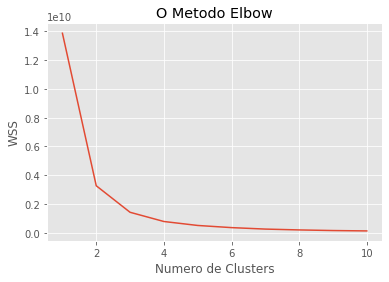

In [123]:
# Método do cotovelo para escolher o númeor de centroides

wcss = []
 
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'random')
   kmeans.fit(X1)
   print (i,kmeans.inertia_)
   wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()


In [124]:
predito = kmeans.predict(X2)

In [125]:
X2['CLUSTER'] = predito

In [126]:
X2.head()

,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,CLUSTER
8388,1,0,0,1174,0.804,1,5,0.000,0.000,0.059,2
3025,0,0,23,1128,0.696,10,24,0.000,0.000,0.091,2
9201,0,0,8,445,0.250,10,24,0.001,0.000,0.048,8
2526,1,0,11,2027,1.000,1,17,0.000,0.000,0.069,9
7799,0,0,11,2071,1.000,1,24,0.000,0.000,0.033,9


## 8.0 Algoritimo Supervisionado

## 8.1  Verificando a Correlação

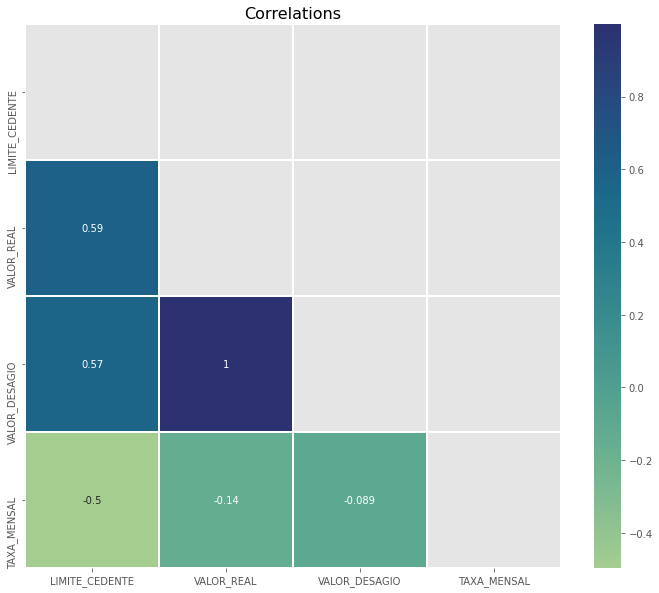

In [412]:
# calcula a correlação
correlations = base_nume.corr(method='pearson')

# usa a variavel x para um unico eixo
fig, ax = plt.subplots()

# define o tamanho da imagem
ax.figure.set_size_inches(12, 10)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlations, cmap="crest", mask=mask, linewidths=.5, annot=True)
plt.title('Correlations', fontsize=16)

# displays the plot
plt.show()

# 9  Criando novas variaáveis

In [594]:
x_train['ANO']= base['DATA_PAGAMENTO'].dt.year
x_train['MES']= base['DATA_PAGAMENTO'].dt.month
x_train['DIA']= base['DATA_PAGAMENTO'].dt.day

In [595]:
x_test['ANO']= base['DATA_PAGAMENTO'].dt.year
x_test['MES']= base['DATA_PAGAMENTO'].dt.month
x_test['DIA']= base['DATA_PAGAMENTO'].dt.day

In [596]:
x_train

,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,RISCO_1,RISCO_2,RISCO_3,RISCO_4,RISCO_5,RISCO_6,RISCO_7,RISCO_8,RISCO_9,RISCO_10,RISCO_11,RISCO_12,RISCO_13,RISCO_14,RISCO_15,RISCO_16,RISCO_17,RISCO_18,RISCO_19,RISCO_20,RISCO_21,ANO,MES,DIA
3154,0,0,23,2253,0.696,10,25,1525392000000000000,1525392000000000000,1525392000000000000,0.000,0.001,0.215,0.132,0.667,0.000,0.772,0.000,0.147,0.000,0.397,0.000,0.013,0.000,0.075,0.448,0,0.267,0.800,0.034,0.032,0.370,0.935,0.966,2018,5,4
4103,0,0,23,4520,0.696,10,4,1512000000000000000,1512000000000000000,1512000000000000000,0.000,0.000,0.199,0.123,0.500,0.000,0.117,0.000,0.071,0.000,0.644,0.000,0.011,0.000,0.230,0.519,0,0.200,0.400,0.018,0.020,0.395,0.812,0.978,2017,11,30
1047,1,0,0,1476,0.804,1,5,1512777600000000000,1512777600000000000,1512777600000000000,0.000,0.000,0.205,0.177,0.500,0.042,0.000,0.000,0.006,0.000,0.566,0.020,0.091,0.333,0.056,0.579,0,0.267,0.800,0.051,0.055,0.420,0.822,0.990,2017,12,9
1808,0,0,8,945,0.250,10,25,1512604800000000000,1512604800000000000,1512604800000000000,0.000,0.000,0.192,0.246,0.000,0.000,0.160,0.000,0.028,0.006,0.888,0.000,0.012,0.000,0.239,0.525,0,0.333,0.600,0.033,0.029,0.383,0.978,0.904,2017,12,7
414,0,0,8,1220,0.250,10,25,1513209600000000000,1513209600000000000,1513209600000000000,0.000,0.000,0.210,0.246,0.000,0.000,0.160,0.000,0.028,0.006,0.230,0.000,0.012,0.000,0.239,0.525,0,0.333,0.600,0.033,0.029,0.383,0.978,1.000,2017,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0,11,423,1.000,1,10,1520985600000000000,1520985600000000000,1520985600000000000,0.000,0.000,0.195,0.047,1.000,0.000,0.030,0.000,0.011,0.000,0.438,0.000,0.003,0.000,0.187,0.066,0,0.133,0.400,0.946,0.950,0.383,0.869,0.907,2018,3,14
5191,0,0,11,437,1.000,1,10,1521763200000000000,1521763200000000000,1521763200000000000,0.000,0.000,0.200,0.047,1.000,0.000,0.030,0.000,0.011,0.000,0.231,0.000,0.003,0.000,0.187,0.066,0,0.133,0.400,0.946,0.950,0.383,0.869,1.000,2018,3,23
5390,3,4,12,474,0.179,2,25,1507161600000000000,1507161600000000000,1507161600000000000,0.000,0.001,0.197,0.676,0.750,0.000,0.693,0.000,0.025,0.000,0.057,0.000,0.013,0.000,0.256,0.556,0,0.200,0.600,0.000,0.000,0.383,0.069,0.972,2017,10,5
860,1,0,0,1596,0.804,1,5,1521158400000000000,1521158400000000000,1521158400000000000,0.002,0.002,0.196,0.186,0.500,0.090,0.009,0.000,0.707,0.000,0.158,0.020,0.145,0.333,0.119,0.301,0,0.200,0.600,0.240,0.242,0.358,0.868,0.984,2018,3,16


# 10 SMOTE (Synthetic Minority Over-sampling Technique)

In [547]:
 from imblearn.over_sampling import SMOTE

In [548]:
smt = SMOTE() 

In [585]:
# Convertendo as data para numero , para poder usar oversample
x_train[['VENCIMENTO'	,'DATA_EMISSAO',	'DATA_PAGAMENTO']] = x_train[['VENCIMENTO'	,'DATA_EMISSAO',	'DATA_PAGAMENTO']].apply(pd.to_numeric)

x_test[['VENCIMENTO'	,'DATA_EMISSAO',	'DATA_PAGAMENTO']] = x_test[['VENCIMENTO'	,'DATA_EMISSAO',	'DATA_PAGAMENTO']].apply(pd.to_numeric)


In [655]:
X_train_ov,y_train_ov = smt.fit_resample(x_train,Y_train)

In [656]:
X_test_ov, y_test_ov = smt.fit_resample(x_test,Y_test)

In [659]:
y_train_ov

array([1, 1, 1, ..., 0, 0, 0])

# 11.0 Métricas 


 A métrica escolhida para verificar a eficácia do modelo vai ser o F1-score


O F1 score combina o recall com a precisão de modo que tragam um único número.

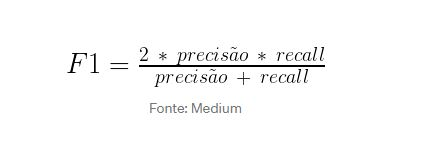

Ela mostra um equilíbrio entre a precisão e o recall como temos um dataset desbalanceado , ela trás uma bom intuição de como o modelo esta se comportando


# 12.0 Modelo base sem overSample

In [608]:
SVC = LinearSVC(random_state=42)

In [609]:
SVC.fit(x_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [610]:
pred = SVC.predict(x_test)

In [615]:
# Podemos ver que o modelo esta indo bem 0  mas não acertou nada na classe 1
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.19      1.00      0.32       548
           1       0.00      0.00      0.00      2277

    accuracy                           0.19      2825
   macro avg       0.10      0.50      0.16      2825
weighted avg       0.04      0.19      0.06      2825



# 13 Validação Cruzada

In [573]:
def cross_valid (model,name,X =  x_train, y= Y_train):
  
  modelo = model()
  cv = 5
  scoring = 'recall' # funcão mse dentro do cross_validation_score
  n_jobs = -1
  
  
  score = cross_val_score(modelo,x_train ,Y_train , cv= cv , scoring= scoring, n_jobs= n_jobs)

  scrore1 = cross_val_score(modelo,x_train ,Y_train , cv= cv , scoring= 'f1', n_jobs= n_jobs)

  Recall = round(score.mean(),3)

  F1 = round(scrore1.mean(),3)

  



  print('Recall',Recall)

  print('F1',F1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [576]:
cross_valid(RandomForestClassifier,'Random')

Recall 0.981
F1 0.918


In [577]:
cross_valid(BaggingClassifier,'Bagg')

Recall 0.933
F1 0.897


In [578]:
cross_valid(GradientBoostingClassifier,'Gradien')

Recall 0.987
F1 0.917


In [616]:
cross_valid(KNeighborsClassifier,'KNG')

Recall 0.942
F1 0.885


In [617]:
cross_valid(MultinomialNB,'Mul')

Recall 0.2
F1 0.178


In [647]:
Grad = GradientBoostingClassifier()

In [651]:
Grad.fit(X_train_ov,y_train_ov)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [660]:
pred =Grad.predict(X_test_ov)

In [662]:
print(classification_report(y_test_ov,pred ))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2277
           1       0.81      0.87      0.84      2277

    accuracy                           0.84      4554
   macro avg       0.84      0.84      0.84      4554
weighted avg       0.84      0.84      0.84      4554



## 14 Escolhendo o Melhor modelo

In [642]:
param_grid = {
  "max_depth": [30,50],
  "max_leaf_nodes": [10,15],
  "n_estimators":[230,250]}

In [643]:
# não deu tempo de rodar o gridSearch
grid = GridSearchCV(GradientBoostingClassifier( ),param_grid,return_train_score= True,scoring='recall')

In [644]:
grid.fit(X_train_ov,y_train_ov)

KeyboardInterrupt: ignored

In [ ]:
pred = grid.predict(X_test_scaler)

pred

In [ ]:
print(classification_report(Y_test_ov,pred ))